In [1]:
import cv2

In [3]:
from deepface import DeepFace

In [4]:
img=cv2.imread('happy.jpg')

In [5]:
import matplotlib.pyplot as plt

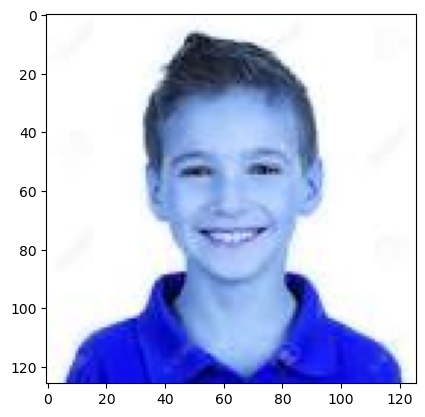

In [6]:
plt.imshow(img)

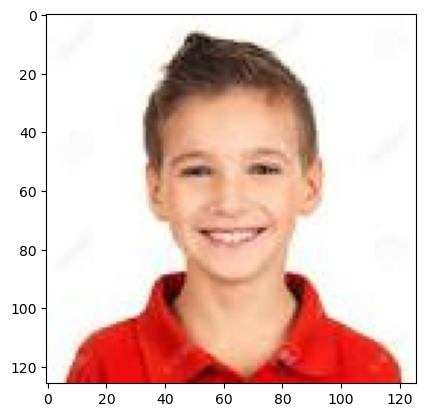

In [7]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [9]:
predictions =  DeepFace.analyze(img)

Action: race: 100%|█████████████████████████████████████████████████████████████████████████████| 4/4 [00:41<00:00, 10.37s/it]


In [10]:
predictions

[{'emotion': {'angry': 3.3838236423258935e-11,
   'disgust': 4.29279843736239e-14,
   'fear': 5.074521550115009e-07,
   'happy': 99.99997019767584,
   'sad': 2.847403559179467e-09,
   'surprise': 1.6120258867158074e-08,
   'neutral': 3.276185420607442e-05},
  'dominant_emotion': 'happy',
  'region': {'x': 30, 'y': 28, 'w': 66, 'h': 66},
  'age': 20,
  'gender': {'Woman': 39.37516510486603, 'Man': 60.62483191490173},
  'dominant_gender': 'Man',
  'race': {'asian': 0.03131397138731011,
   'indian': 0.4061221387161099,
   'black': 0.01098473359879381,
   'white': 60.86542373093508,
   'middle eastern': 26.895575338338336,
   'latino hispanic': 11.790581005250276},
  'dominant_race': 'white'}]

In [11]:
len(predictions)

1

In [12]:
type(predictions)

list

In [15]:
p1 = predictions[0]
p1

{'emotion': {'angry': 3.3838236423258935e-11,
  'disgust': 4.29279843736239e-14,
  'fear': 5.074521550115009e-07,
  'happy': 99.99997019767584,
  'sad': 2.847403559179467e-09,
  'surprise': 1.6120258867158074e-08,
  'neutral': 3.276185420607442e-05},
 'dominant_emotion': 'happy',
 'region': {'x': 30, 'y': 28, 'w': 66, 'h': 66},
 'age': 20,
 'gender': {'Woman': 39.37516510486603, 'Man': 60.62483191490173},
 'dominant_gender': 'Man',
 'race': {'asian': 0.03131397138731011,
  'indian': 0.4061221387161099,
  'black': 0.01098473359879381,
  'white': 60.86542373093508,
  'middle eastern': 26.895575338338336,
  'latino hispanic': 11.790581005250276},
 'dominant_race': 'white'}

In [16]:
p1.keys()

dict_keys(['emotion', 'dominant_emotion', 'region', 'age', 'gender', 'dominant_gender', 'race', 'dominant_race'])

In [17]:
p1.get('dominant_emotion')

'happy'

In [18]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [19]:
cv2.CascadeClassifier

cv2.CascadeClassifier

In [20]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #print(face.Cascade.empty())
faces = faceCascade.detectMultiScale(gray,1.1,4)

   #Draw a rectangle around the faces
for(x,y,w,h) in faces:
    cv2.rectangle(img, (x, y), (x+w , y+h), (0 , 255, 0), 2)

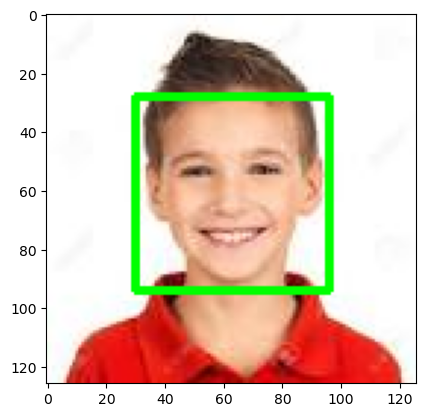

In [21]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [22]:
font = cv2.FONT_HERSHEY_SIMPLEX

     #use putText() method for
     # inserting text on video
        
cv2.putText(img,
                p1.get('dominant_emotion'),
                (0, 50),
                font, 1,
                (0, 0, 225),
                 2,
                 cv2.LINE_4);

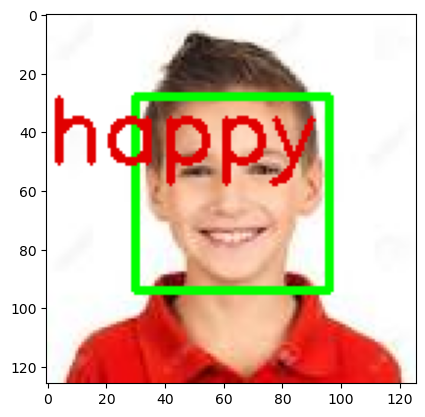

In [23]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [24]:
img=cv2.imread('sad.jpg')

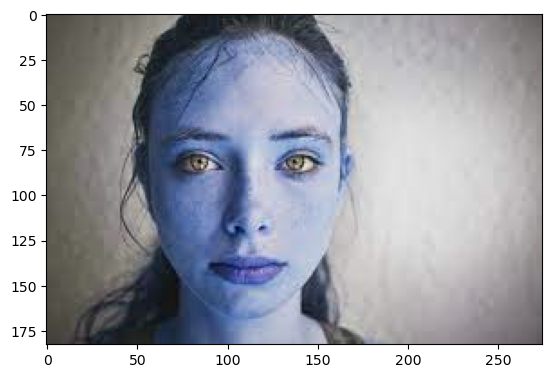

In [25]:
plt.imshow(img)

In [26]:
predictions =  DeepFace.analyze(img)

Action: race: 100%|█████████████████████████████████████████████████████████████████████████████| 4/4 [00:39<00:00,  9.83s/it]


In [27]:
p1 = predictions[0]
p1

{'emotion': {'angry': 0.0004869683670348958,
  'disgust': 9.378757011033948e-10,
  'fear': 2.2660005325675328,
  'happy': 0.007077726753637672,
  'sad': 0.32460938279982704,
  'surprise': 0.0010759497586272514,
  'neutral': 97.40074857477835},
 'dominant_emotion': 'neutral',
 'region': {'x': 42, 'y': 25, 'w': 143, 'h': 143},
 'age': 31,
 'gender': {'Woman': 99.99850988388062, 'Man': 0.0014855627341603395},
 'dominant_gender': 'Woman',
 'race': {'asian': 0.2573662204667926,
  'indian': 0.3172832541167736,
  'black': 0.01838400785345584,
  'white': 82.72235989570618,
  'middle eastern': 10.785238444805145,
  'latino hispanic': 5.899368971586227},
 'dominant_race': 'white'}

In [28]:
p1.get('dominant_emotion')

'neutral'

#  REAL TIME VIDEO DEMO FOR FACE EMOTION RECOGNITION

In [ ]:
import cv2
from deepface import DeepFace

# Load the pre-trained face cascade classifier
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Open the webcam
cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()

    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        # Analyze emotions for each detected face
        face_img = frame[y:y+h, x:x+w]  # Extract the face region
        predictions = DeepFace.analyze(face_img)
        emotion = predictions[0].get('dominant_emotion')  # Get the dominant emotion
        
        # Display the emotion above the face
        cv2.putText(frame, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

    cv2.imshow('Original Video', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
